In [ ]:
import torch
import torchtext

glove = torchtext.vocab.GloVe(name="840B",
                              dim=300)

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [06:13<00:00, 5882.95it/s]


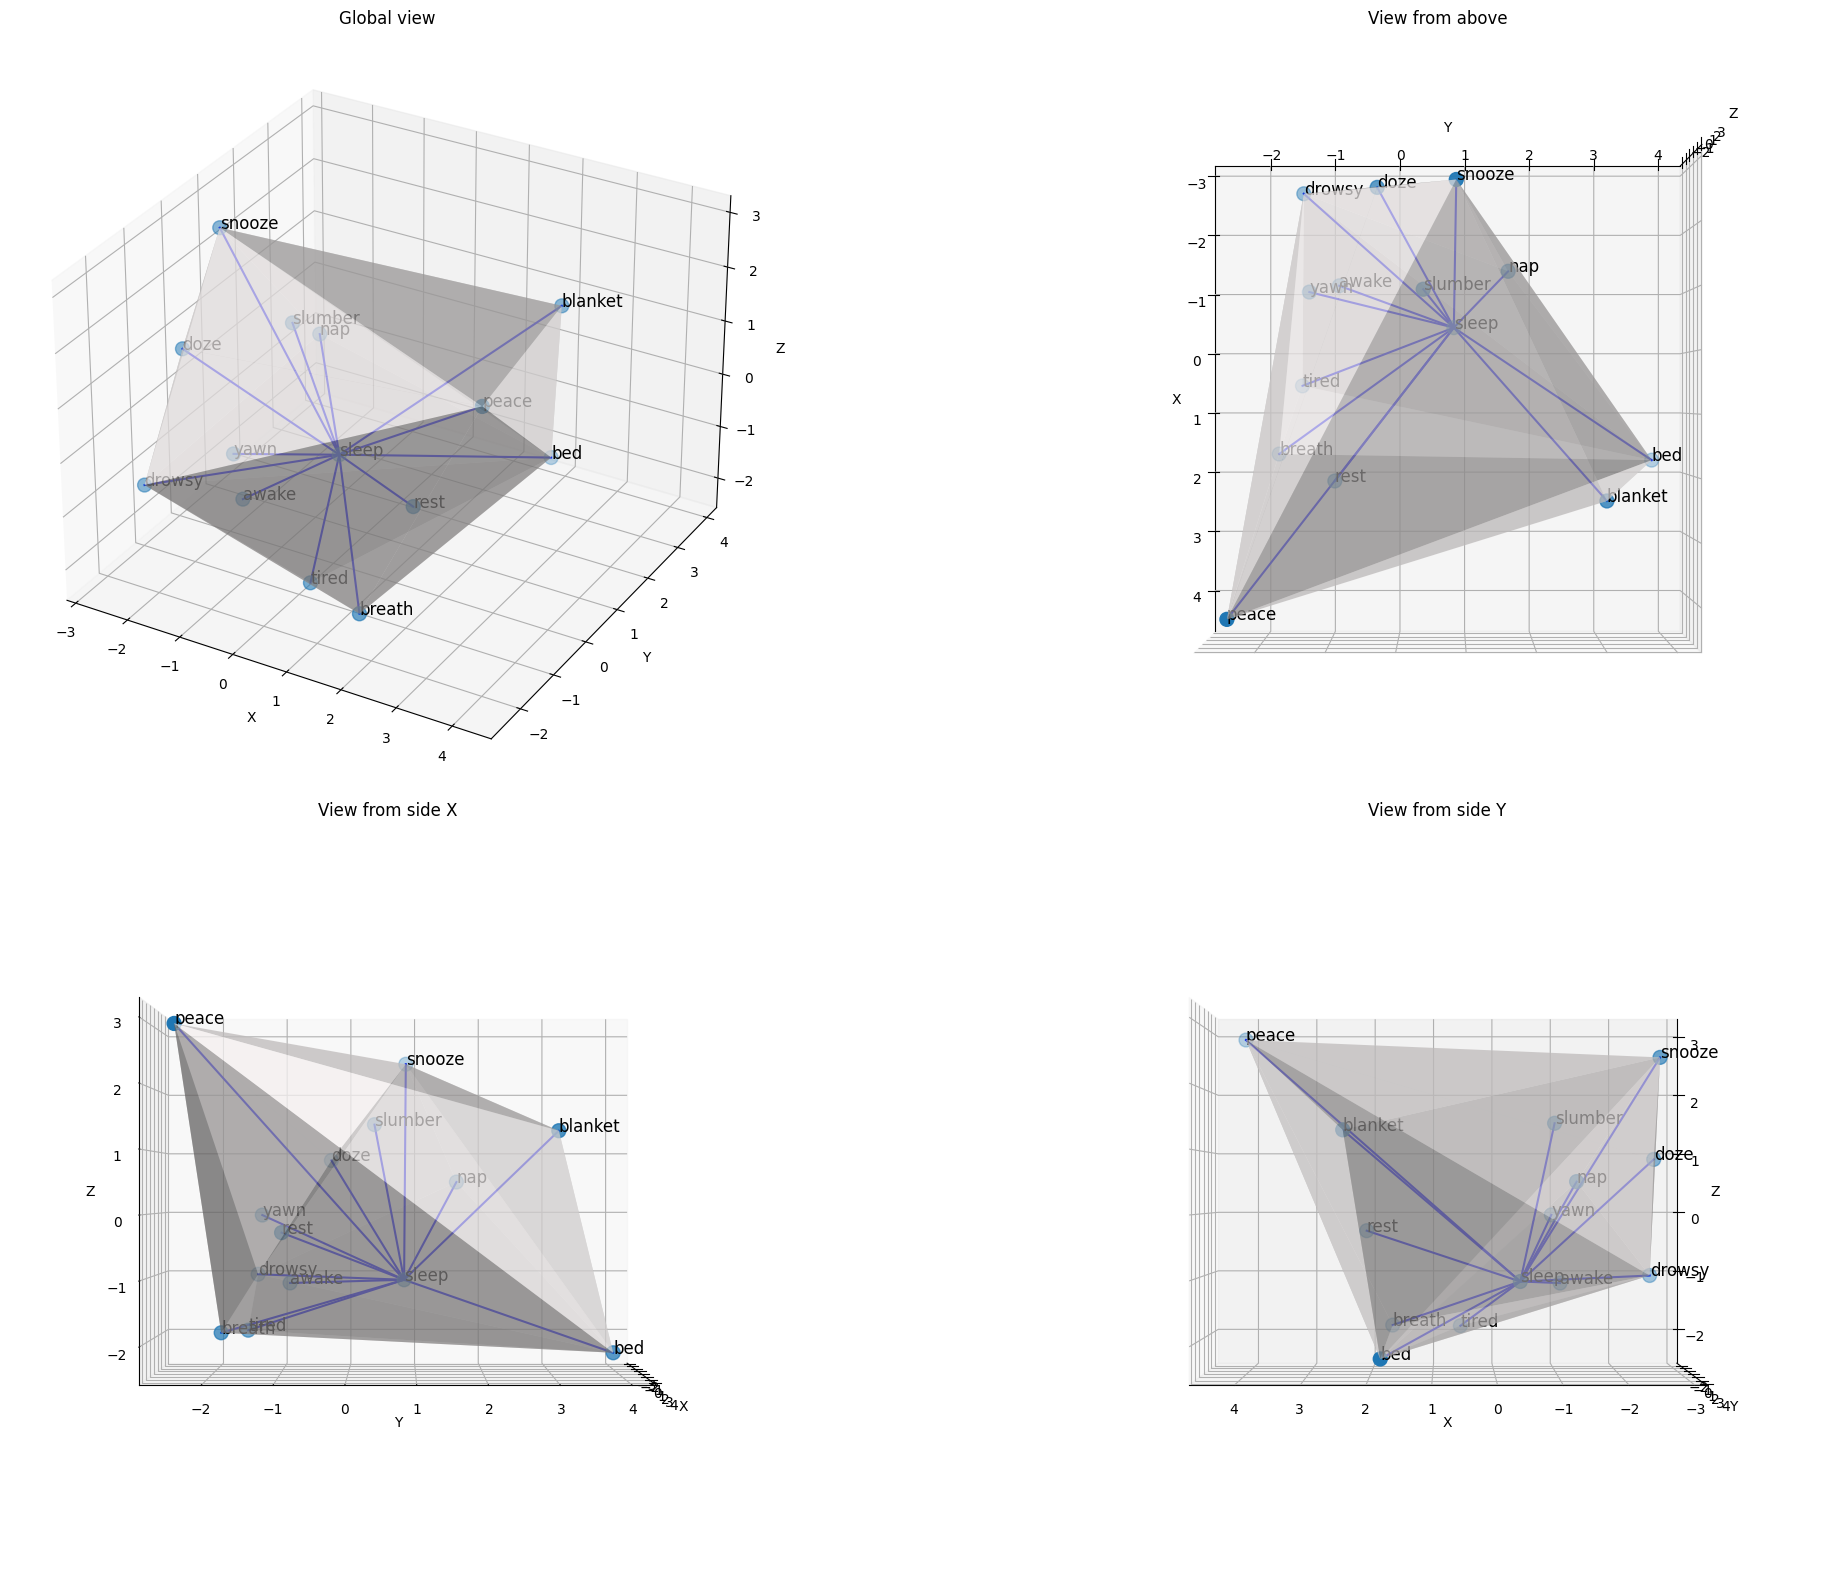

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

# List of words for which you want to obtain the vectors
words = ['sleep', 'awake', 'bed', 'tired', 'rest', 'snooze', 'blanket', 'doze', 'breath', 'slumber', 'nap', 'peace', 'yawn', 'drowsy']

# Retrieve GloVe vectors (replace with your actual retrieval method)
glove_vectors = []
for word in words:
    vector_word = glove[word]  # Assuming glove[word] returns the vector for the given word
    glove_vectors.append(vector_word)

# Stack GloVe vectors vertically to form a matrix
vectors_array = np.vstack(glove_vectors)

# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)

# Fit and transform vectors
reduced_vectors = pca.fit_transform(vectors_array)

fig = plt.figure(figsize=(24, 16))

# Global view
ax_global = fig.add_subplot(221, projection='3d')
ax_global.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_global.set_title('Global view')
ax_global.set_xlabel('X')
ax_global.set_ylabel('Y')
ax_global.set_zlabel('Z')

# Add word labels for global view
for i, word in enumerate(words):
    ax_global.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=12)

# Create the convex hull
hull = ConvexHull(reduced_vectors)

# Plot the surfaces of the convex hull for the global view
ax_global.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.5)

# Calculate edges towards the "sleep" point
sleep_index = words.index('sleep')
sleep_point = reduced_vectors[sleep_index]
edges_to_sleep = [(point, sleep_point) for i, point in enumerate(reduced_vectors) if i != sleep_index]

# Plot the edges towards the "sleep" point for the global view
for edge in edges_to_sleep:
    ax_global.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# View from above
ax_above = fig.add_subplot(222, projection='3d')
ax_above.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_above.set_title('View from above')
ax_above.set_xlabel('X')
ax_above.set_ylabel('Y')
ax_above.set_zlabel('Z')
ax_above.view_init(elev=90, azim=0)  # Set elevation to 90 degrees (above)

# Add word labels for view from above
for i, word in enumerate(words):
    ax_above.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=12)

# Plot the surfaces of the convex hull for the view from above
ax_above.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.5)

# Plot the edges towards the "sleep" point for the view from above
for edge in edges_to_sleep:
    ax_above.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# View from side X
ax_side_x = fig.add_subplot(223, projection='3d')
ax_side_x.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_side_x.set_title('View from side X')
ax_side_x.set_xlabel('X')
ax_side_x.set_ylabel('Y')
ax_side_x.set_zlabel('Z')
ax_side_x.view_init(elev=0, azim=0)  # Set elevation and azimuth to 0 degrees (side X)

# Add word labels for view from side X
for i, word in enumerate(words):
    ax_side_x.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=12)

# Plot the surfaces of the convex hull for the view from side X
ax_side_x.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.5)

# Plot the edges towards the "sleep" point for the view from side X
for edge in edges_to_sleep:
    ax_side_x.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# View from side Y
ax_side_y = fig.add_subplot(224, projection='3d')
ax_side_y.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_side_y.set_title('View from side Y')
ax_side_y.set_xlabel('X')
ax_side_y.set_ylabel('Y')
ax_side_y.set_zlabel('Z')
ax_side_y.view_init(elev=0, azim=90)  # Set elevation to 0 degrees and azimuth to 90 degrees (side Y)

# Add word labels for view from side Y
for i, word in enumerate(words):
    ax_side_y.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=12)

# Plot the surfaces of the convex hull for the view from side Y
ax_side_y.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.5)

# Plot the edges towards the "sleep" point for the view from side Y
for edge in edges_to_sleep:
    ax_side_y.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS

words = ['sleep', 'Coffee', 'awake', 'bed', 'tired', 'rest', 'snooze', 'blanket', 'doze', 'breath', 'slumber', 'nap', 'peace', 'yawn', 'drowsy']

# Ensure vectors_array has the same length as words
assert len(vectors_array) == len(words)

# Create an MDS object for transforming data to 2 dimensions
mds = MDS(n_components=2, random_state=0)

# Apply MDS transformation to the GloVe vectors
transformed_vectors = mds.fit_transform(vectors_array)

# Now, transformed_vectors is a 15x2 matrix where each row is a 2D representation of a word
fig = plt.figure()

# Create a 2D subplot
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(transformed_vectors[:, 0], transformed_vectors[:, 1])

# Label the points with the corresponding words
for i, word in enumerate(words):
    ax.text(transformed_vectors[i, 0], transformed_vectors[i, 1], word)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


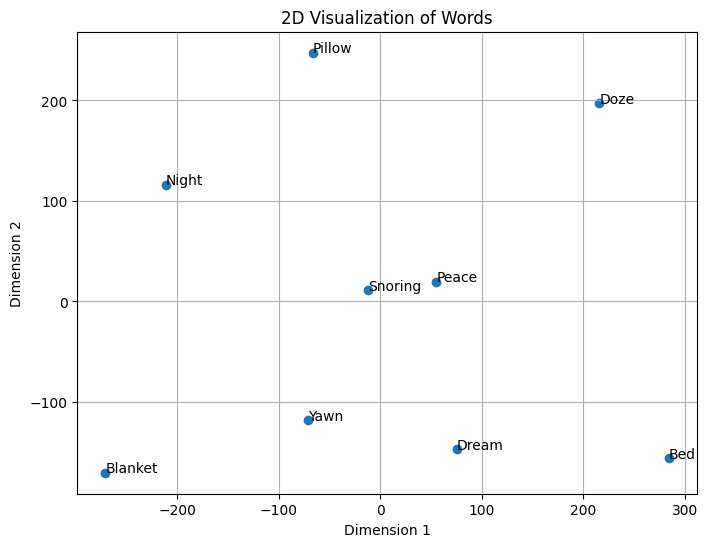

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

from scipy.spatial import ConvexHull
import matplotlib.font_manager as fm
import requests

# Download the font file
def download_font(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# URL of the font file
font_url = 'https://db.onlinewebfonts.com/t/32441506567156636049eb850b53f02a.ttf'
# Local filename for the font file
font_filename = 'times_new_roman.ttf'

# Download the font file
download_font(font_url, font_filename)

# List of words for which you want to obtain the vectors
words = ['sleep', 'awake', 'bed', 'tired', 'rest', 'snooze', 'blanket', 'doze', 'breath', 'slumber', 'nap', 'peace', 'yawn', 'drowsy']

# Retrieve GloVe vectors (replace with your actual retrieval method)
glove_vectors = []
for word in words:
    vector_word = glove[word]
    glove_vectors.append(vector_word)

# Stack GloVe vectors vertically to form a matrix
vectors_array = np.vstack(glove_vectors)

# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)

# Fit and transform vectors
reduced_vectors = pca.fit_transform(vectors_array)

# Load custom font from local file
prop = fm.FontProperties(fname=font_filename)

fig = plt.figure(figsize=(24, 16))

# Global view
ax_global = fig.add_subplot(221, projection='3d')
ax_global.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_global.set_title('Global view')
ax_global.set_xlabel('X')
ax_global.set_ylabel('Y')
ax_global.set_zlabel('Z')

# Add word labels for global view
for i, word in enumerate(words):
    ax_global.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# Create the convex hull
hull = ConvexHull(reduced_vectors)

# Plot the surfaces of the convex hull for the global view
ax_global.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.15)

# Calculate edges towards the "sleep" point
sleep_index = words.index('sleep')
sleep_point = reduced_vectors[sleep_index]
edges_to_sleep = [(point, sleep_point) for i, point in enumerate(reduced_vectors) if i != sleep_index]

# Plot the edges towards the "sleep" point for the global view
for edge in edges_to_sleep:
    ax_global.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# View from above
ax_above = fig.add_subplot(222, projection='3d')
ax_above.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_above.set_title('View from side Z')
ax_above.set_xlabel('X')
ax_above.set_ylabel('Y')
ax_above.set_zlabel('Z')
ax_above.view_init(elev=90, azim=0)  # Set elevation to 90 degrees (above)

# Add word labels for view from above
for i, word in enumerate(words):
    ax_above.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# Plot the surfaces of the convex hull for the view from above
ax_above.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.15)

# Plot the edges towards the "sleep" point for the view from above
for edge in edges_to_sleep:
    ax_above.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# View from side X
ax_side_x = fig.add_subplot(223, projection='3d')
ax_side_x.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_side_x.set_title('View from side X')
ax_side_x.set_xlabel('X')
ax_side_x.set_ylabel('Y')
ax_side_x.set_zlabel('Z')
ax_side_x.view_init(elev=0, azim=0)  # Set elevation and azimuth to 0 degrees (side X)

# Add word labels for view from side X
for i, word in enumerate(words):
    ax_side_x.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# Plot the surfaces of the convex hull for the view from side X
ax_side_x.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.15)

# Plot the edges towards the "sleep" point for the view from side X
for edge in edges_to_sleep:
    ax_side_x.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# View from side Y
ax_side_y = fig.add_subplot(224, projection='3d')
ax_side_y.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_side_y.set_title('View from side Y')
ax_side_y.set_xlabel('X')
ax_side_y.set_ylabel('Y')
ax_side_y.set_zlabel('Z')
ax_side_y.view_init(elev=0, azim=90)  # Set elevation to 0 degrees and azimuth to 90 degrees (side Y)

# Add word labels for view from side Y
for i, word in enumerate(words):
    ax_side_y.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# Plot the surfaces of the convex hull for the view from side Y
ax_side_y.plot_trisurf(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], triangles=hull.simplices, color='snow', alpha=0.15)

# Plot the edges towards the "sleep" point for the view from side Y
for edge in edges_to_sleep:
    ax_side_y.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], [edge[0][2], edge[1][2]], color='blue')

# Plot connections between points of convex hull in black
for simplex in hull.simplices:
    for i in range(len(simplex)):
        for j in range(i+1, len(simplex)):
            ax_global.plot([reduced_vectors[simplex[i], 0], reduced_vectors[simplex[j], 0]],
                           [reduced_vectors[simplex[i], 1], reduced_vectors[simplex[j], 1]],
                           [reduced_vectors[simplex[i], 2], reduced_vectors[simplex[j], 2]], color='gray')
            ax_above.plot([reduced_vectors[simplex[i], 0], reduced_vectors[simplex[j], 0]],
                          [reduced_vectors[simplex[i], 1], reduced_vectors[simplex[j], 1]],
                          [reduced_vectors[simplex[i], 2], reduced_vectors[simplex[j], 2]], color='gray')
            ax_side_x.plot([reduced_vectors[simplex[i], 0], reduced_vectors[simplex[j], 0]],
                           [reduced_vectors[simplex[i], 1], reduced_vectors[simplex[j], 1]],
                           [reduced_vectors[simplex[i], 2], reduced_vectors[simplex[j], 2]], color='gray')
            ax_side_y.plot([reduced_vectors[simplex[i], 0], reduced_vectors[simplex[j], 0]],
                           [reduced_vectors[simplex[i], 1], reduced_vectors[simplex[j], 1]],
                           [reduced_vectors[simplex[i], 2], reduced_vectors[simplex[j], 2]], color='gray')

plt.tight_layout()

# Save the figure as SVG
plt.savefig('visualization.svg', format='svg')

plt.show()


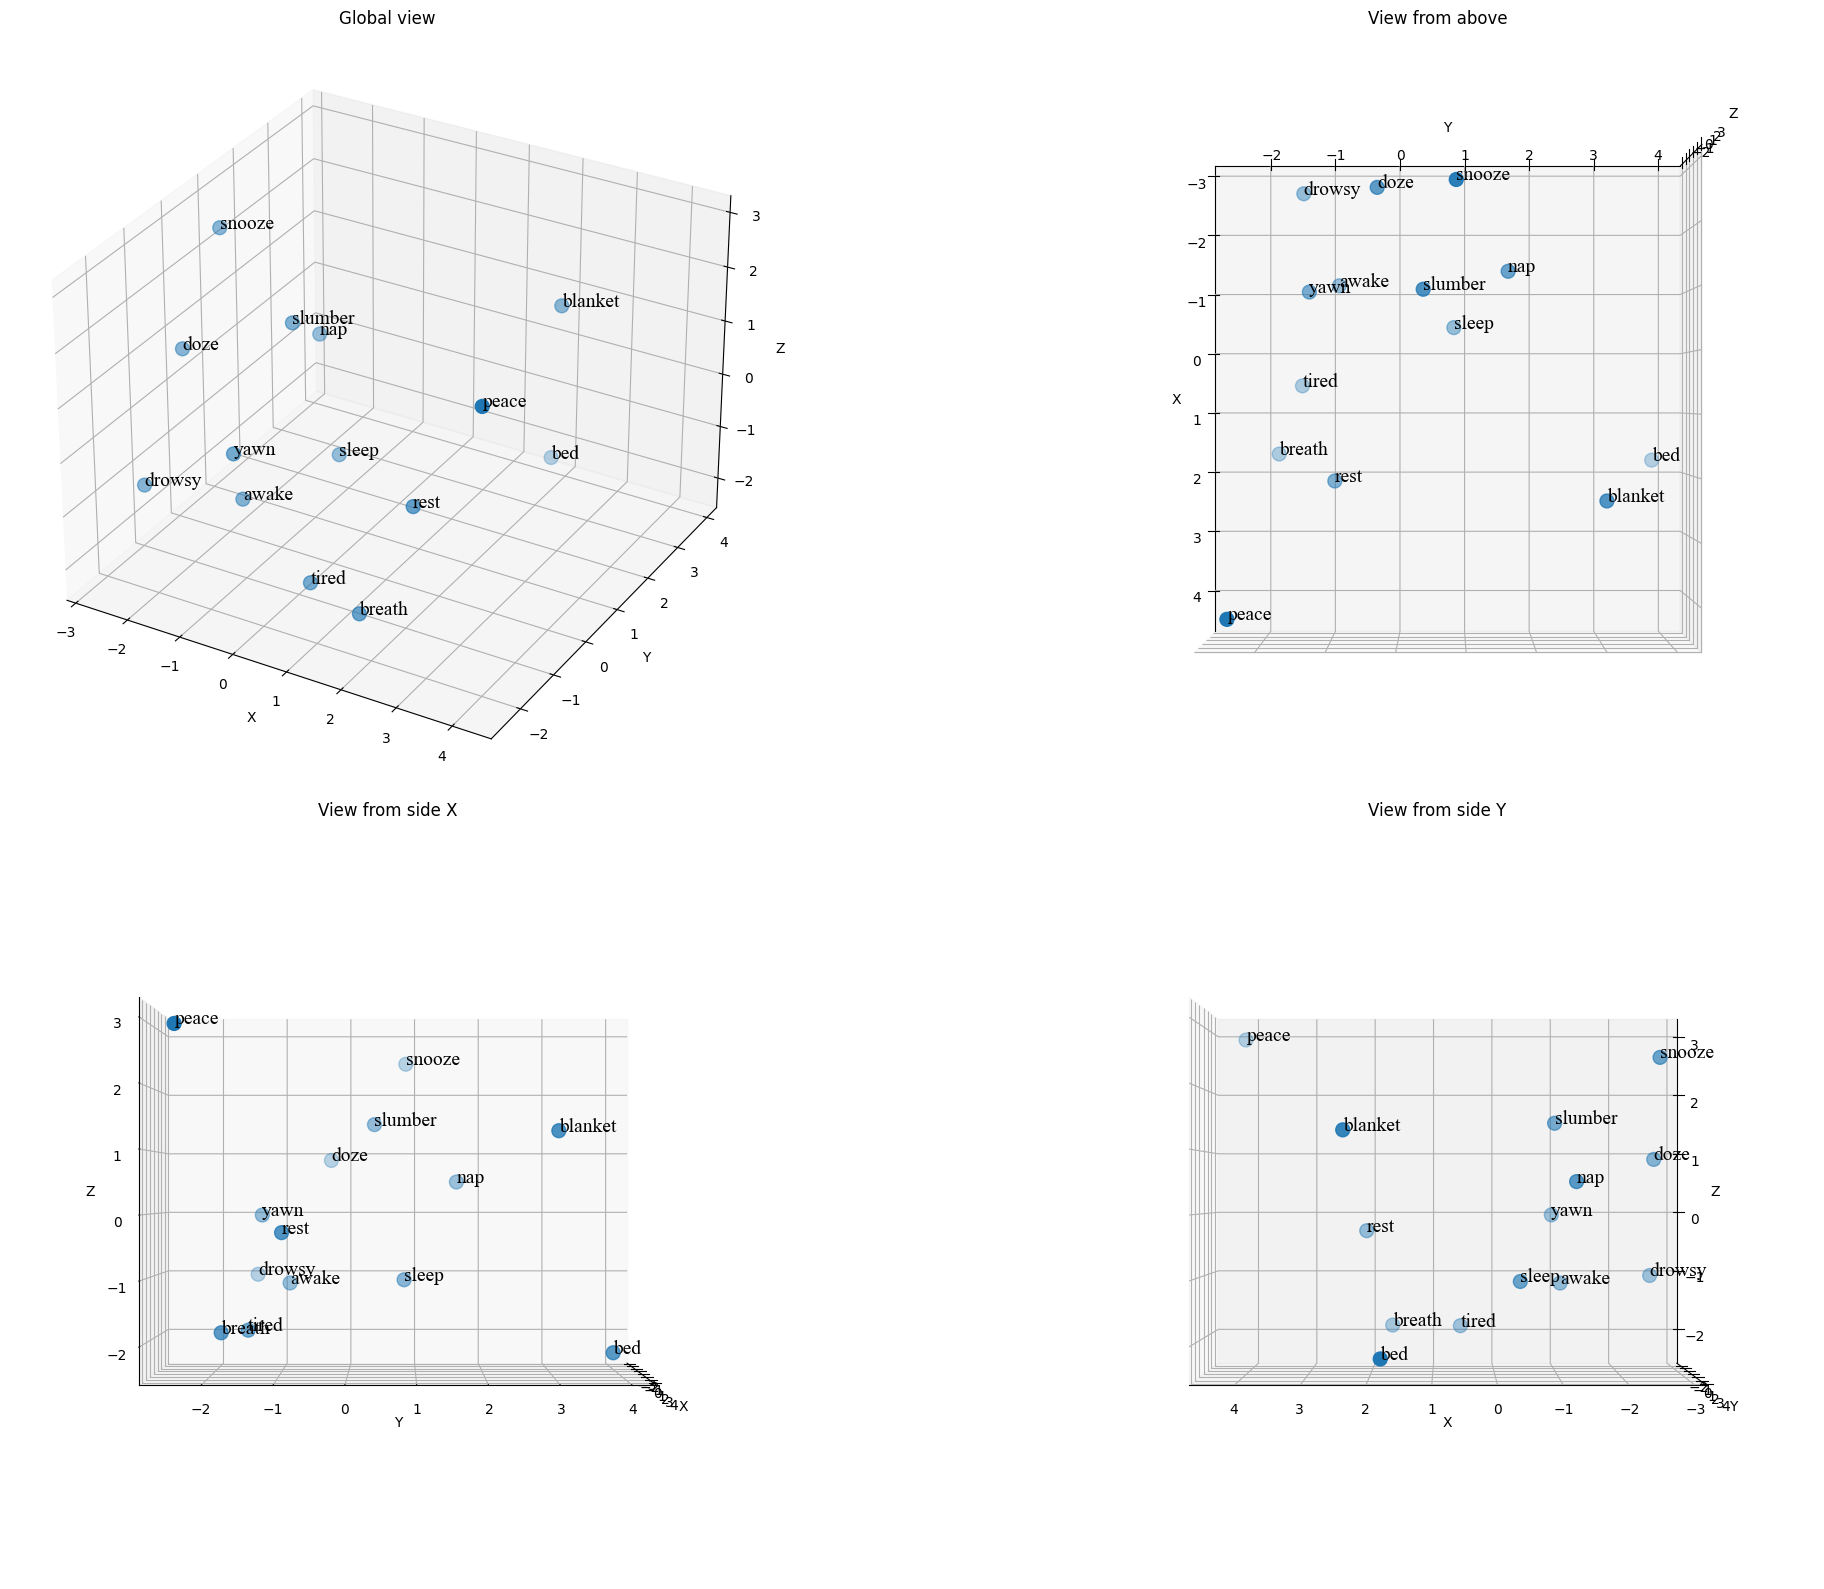

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm
import requests

# Function to download the font file
def download_font(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# URL of the font file
font_url = 'https://db.onlinewebfonts.com/t/32441506567156636049eb850b53f02a.ttf'
# Local filename for the font file
font_filename = 'times_new_roman.ttf'

# Download the font file
download_font(font_url, font_filename)

# List of words for which you want to obtain the vectors
words = ['sleep', 'awake', 'bed', 'tired', 'rest', 'snooze', 'blanket', 'doze', 'breath', 'slumber', 'nap', 'peace', 'yawn', 'drowsy']

# Retrieve GloVe vectors (replace with your actual retrieval method)
glove_vectors = []
for word in words:
    vector_word = glove[word]
    glove_vectors.append(vector_word)

# Stack GloVe vectors vertically to form a matrix
vectors_array = np.vstack(glove_vectors)

# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)

# Fit and transform vectors
reduced_vectors = pca.fit_transform(vectors_array)

# Load custom font from local file
prop = fm.FontProperties(fname=font_filename)

fig = plt.figure(figsize=(24, 16))

# Global view
ax_global = fig.add_subplot(221, projection='3d')
ax_global.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_global.set_title('Global view')
ax_global.set_xlabel('X')
ax_global.set_ylabel('Y')
ax_global.set_zlabel('Z')

# Add word labels for global view
for i, word in enumerate(words):
    ax_global.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# View from above
ax_above = fig.add_subplot(222, projection='3d')
ax_above.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_above.set_title('View from above')
ax_above.set_xlabel('X')
ax_above.set_ylabel('Y')
ax_above.set_zlabel('Z')
ax_above.view_init(elev=90, azim=0)  # Set elevation to 90 degrees (above)

# Add word labels for view from above
for i, word in enumerate(words):
    ax_above.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# View from side X
ax_side_x = fig.add_subplot(223, projection='3d')
ax_side_x.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_side_x.set_title('View from side X')
ax_side_x.set_xlabel('X')
ax_side_x.set_ylabel('Y')
ax_side_x.set_zlabel('Z')
ax_side_x.view_init(elev=0, azim=0)  # Set elevation and azimuth to 0 degrees (side X)

# Add word labels for view from side X
for i, word in enumerate(words):
    ax_side_x.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

# View from side Y
ax_side_y = fig.add_subplot(224, projection='3d')
ax_side_y.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_side_y.set_title('View from side Y')
ax_side_y.set_xlabel('X')
ax_side_y.set_ylabel('Y')
ax_side_y.set_zlabel('Z')
ax_side_y.view_init(elev=0, azim=90)  # Set elevation to 0 degrees and azimuth to 90 degrees (side Y)

# Add word labels for view from side Y
for i, word in enumerate(words):
    ax_side_y.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=14, fontproperties=prop)

plt.tight_layout()

# Save the figure as SVG
plt.savefig('visualization.svg', format='svg')

plt.show()


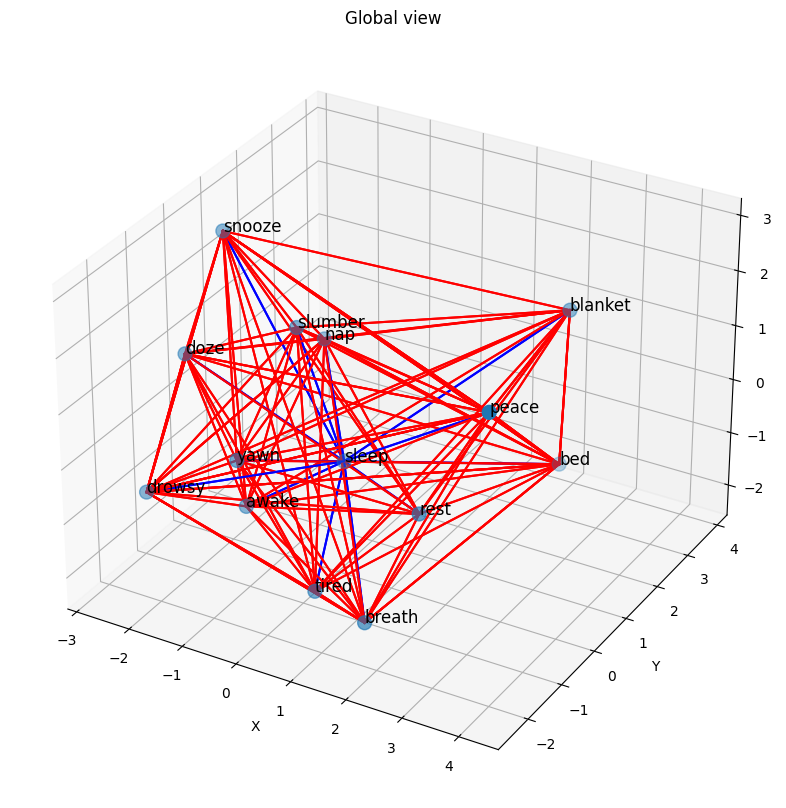

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# List of words for which you want to obtain the vectors
words = ['sleep', 'awake', 'bed', 'tired', 'rest', 'snooze', 'blanket', 'doze', 'breath', 'slumber', 'nap', 'peace', 'yawn', 'drowsy']

# Initialize a list to store the corresponding GloVe vectors
glove_vectors = []

# Retrieve GloVe vectors for each word
for word in words:
    vector_word = glove[word]  # Assuming glove[word] returns the vector for the given word
    glove_vectors.append(vector_word)

# Stack GloVe vectors vertically to form a matrix
vectors_array = np.vstack(glove_vectors)

# Initialize PCA to reduce to 3 dimensions
pca = PCA(n_components=3)

# Fit and transform vectors
reduced_vectors = pca.fit_transform(vectors_array)

fig = plt.figure(figsize=(24, 16))

# Global view
ax_global = fig.add_subplot(221, projection='3d')
ax_global.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], s=100)  # Larger markers
ax_global.set_title('Global view')
ax_global.set_xlabel('X')
ax_global.set_ylabel('Y')
ax_global.set_zlabel('Z')

# Add word labels
for i, word in enumerate(words):
    ax_global.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word, fontsize=12)

# Create a list to store all connections
all_connections = []

# Connect each vector to all other points
for i, v1 in enumerate(reduced_vectors):
    for j, v2 in enumerate(reduced_vectors):
        if i != j:  # Do not connect a vector to itself
            all_connections.append((v1, v2))

# Convert the list to numpy array for easier processing
all_connections = np.array(all_connections)

# Filter connections to keep only those forming the edges of the solid
edges = []
for connection in all_connections:
    v1, v2 = connection
    edge_exists = True
    for point in reduced_vectors:
        if not np.array_equal(point, v1) and not np.array_equal(point, v2):
            # Check if the edge formed by v1 and v2 is blocked by any other point
            if np.linalg.norm(np.cross(v2 - v1, point - v1)) < 1e-5:
                edge_exists = False
                break
    if edge_exists:
        edges.append((v1, v2))

# Convert the list of edges to numpy array for plotting
edges = np.array(edges)

# Plot the edges of the solid
for edge in edges:
    if np.array_equal(edge[0], reduced_vectors[words.index('sleep')]) or np.array_equal(edge[1], reduced_vectors[words.index('sleep')]):
        ax_global.plot(edge[:, 0], edge[:, 1], edge[:, 2], color='blue')  # Change color for edges connected to 'sleep'
    else:
        ax_global.plot(edge[:, 0], edge[:, 1], edge[:, 2], color='red')  # Keep other edges in red

# **Key modification:** Use SciPy's ConvexHull function to create the hull
hull = ConvexHull(reduced_vectors)

# Plot the edges of the convex hull
for simplex in hull.simplices:
    ax_global.plot(reduced_vectors[simplex, 0], reduced_vectors[simplex, 1], reduced_vectors[simplex, 2], color='red')

plt.tight_layout()
plt.show()
